In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [139]:
# Load the data from CSV using the Pandas library
df = pd.read_csv('./crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [141]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,992.673282,18.026142,True,True,140,8.527341,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,147.998025,29.794042,False,False,106,1.127443,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,False,True,146,6.517573,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,730.379174,31.620687,True,True,110,7.248251,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [143]:
df_encoded['Fertilizer_Used'] = df['Fertilizer_Used'].map({True: 1.0 , False: 0.0})
df_encoded['Irrigation_Used'] = df['Irrigation_Used'].map({True: 1.0 , False: 0.0})
X = df_encoded.drop(columns=['Yield_tons_per_hectare'])
y= df_encoded[['Yield_tons_per_hectare']]

In [145]:
X = df_encoded[['Rainfall_mm', 
        'Temperature_Celsius', 
        'Fertilizer_Used', 
        'Irrigation_Used', 
        'Days_to_Harvest',
        'Region_East',
        'Region_West',
        'Region_North',
        'Region_South',
        'Soil_Type_Clay',
        'Soil_Type_Sandy',
        'Soil_Type_Loam',
        'Soil_Type_Silt',
        'Soil_Type_Peaty',
        'Soil_Type_Chalky',
        'Crop_Barley',
        'Crop_Cotton',
        'Crop_Maize',
        'Crop_Rice',
        'Crop_Soybean',
        'Crop_Wheat',
        'Weather_Condition_Cloudy',
        'Weather_Condition_Rainy',
        'Weather_Condition_Sunny',
         ]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_)
print(linreg.coef_)
predict = linreg.predict(X_test)
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("(Accuracy)R² Score:", round(r2*100),'%')

[4.64961452]
[[ 1.29896412e+00  1.44058152e-01  7.50377376e-01  5.99726754e-01
   8.39685160e-04  1.76650143e+10  1.76736000e+10  1.76826395e+10
   1.76728773e+10  8.36125178e+10  8.37607991e+10  8.36920851e+10
   8.36055442e+10  8.37014505e+10  8.36658494e+10 -1.07859657e+11
  -1.07698148e+11 -1.07834500e+11 -1.07893064e+11 -1.07732704e+11
  -1.07777590e+11  5.31124144e+10  5.31620454e+10  5.31545716e+10]]
Mean Squared Error: 0.250525772217407
Mean Absolute Error: 0.39952093153931223
(Accuracy)R² Score: 91 %


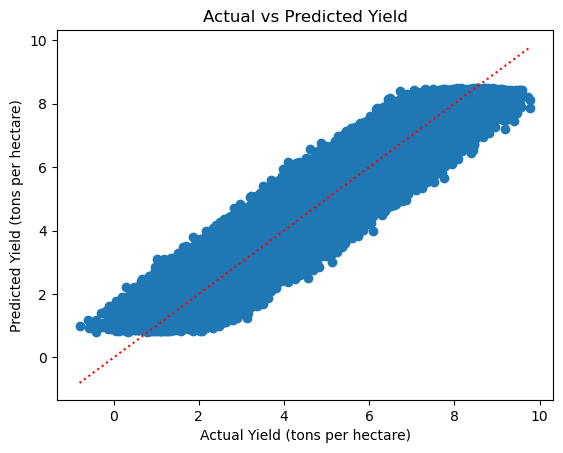

In [150]:
plt.scatter(y_test, predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle=':')
plt.xlabel('Actual Yield (tons per hectare)')
plt.ylabel('Predicted Yield (tons per hectare)')
plt.title('Actual vs Predicted Yield')
plt.show()

In [152]:
reduced_X = df.drop(columns=["Region", "Soil_Type",	"Crop",	"Weather_Condition", "Days_to_Harvest", "Yield_tons_per_hectare"], axis=1)
reduced_X['Fertilizer_Used'] = df['Fertilizer_Used'].map({True: 1.0 , False: 0.0})
reduced_X['Irrigation_Used'] = df['Irrigation_Used'].map({True: 1.0 , False: 0.0})

reduced_X_train, reduced_X_test, reduced_y_train, reduced_y_test = train_test_split(reduced_X, y, test_size=0.25, random_state=3)

reduced_scaler = StandardScaler()
reduced_X_train = scaler.fit_transform(reduced_X_train)
reduced_X_test= scaler.transform(reduced_X_test)

reduced_linreg = LinearRegression()
reduced_linreg.fit(reduced_X_train, reduced_y_train)
print(reduced_linreg.intercept_)
print(reduced_linreg.coef_)
reduced_predict = reduced_linreg.predict(reduced_X_test)
reduced_mse = mean_squared_error(reduced_y_test, reduced_predict)
reduced_mae = mean_absolute_error(reduced_y_test, reduced_predict)
reduced_r2 = r2_score(reduced_y_test, reduced_predict)

print("Mean Squared Error:", reduced_mse)
print("Mean Absolute Error:", reduced_mae)
print("(Accuracy)R² Score:", round(reduced_r2*100),'%')

[4.64959526]
[[1.29895732 0.14401511 0.75034072 0.59973453]]
Mean Squared Error: 0.25052537426558774
Mean Absolute Error: 0.39951936358838436
(Accuracy)R² Score: 91 %


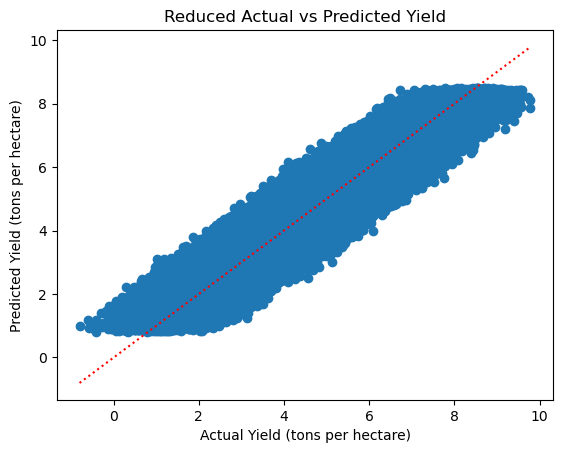

In [154]:
plt.scatter(reduced_y_test, reduced_predict)
plt.plot([reduced_y_test.min(), reduced_y_test.max()], [reduced_y_test.min(), reduced_y_test.max()], color='red', linestyle=':')
plt.xlabel('Actual Yield (tons per hectare)')
plt.ylabel('Predicted Yield (tons per hectare)')
plt.title('Reduced Actual vs Predicted Yield')
plt.show()

No information was lost despite reducing the features down to 4 from the original 25 as seen by the mean squared error, mean absolute error, and R^2 score being the same on both sets of features.